In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../../data/processed/cleaned_music_population.csv')
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [3]:
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot.shape, df.shape

((45020, 31), (45020, 13))

In [20]:
#Eliminating outliers
df_onehot = df_onehot[df_onehot['popularity'] > 0]

Recordar utilizar varibles con one hot emcoding para ver si los modelos mejoran.

In [21]:
X = df_onehot.drop(columns=['popularity'])
y = df_onehot['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [22]:
df_results = X_test.copy()
df_results['popularity_real'] = y_test
df_results['popularity_pred'] = y_pred.round(2)

df_results.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,...,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_real,popularity_pred
18819,0.203000,0.541,0.8120,0.000000,0.4200,-3.764,0.0336,141.056,0.6070,False,...,False,False,True,False,False,False,False,False,62.0,46.09
17684,0.013900,0.641,0.7320,0.000003,0.0620,-7.570,0.0795,92.057,0.7630,False,...,False,False,False,False,False,False,False,False,57.0,50.62
5688,0.008850,0.698,0.8200,0.000000,0.0901,-3.809,0.1300,141.995,0.9620,False,...,False,False,False,False,False,False,False,False,23.0,26.29
22846,0.301000,0.749,0.8870,0.000030,0.2970,-0.898,0.0436,135.006,0.6380,False,...,False,False,False,False,False,False,True,False,59.0,61.55
9255,0.024600,0.680,0.4090,0.914000,0.0757,-8.695,0.0898,180.893,0.4270,False,...,False,False,False,False,False,True,False,False,37.0,40.72
5730,0.202000,0.608,0.8080,0.002330,0.3120,-5.238,0.0310,119.980,0.4100,False,...,False,False,False,False,False,False,False,False,14.0,26.43
37829,0.995000,0.337,0.0445,0.890000,0.0748,-25.484,0.0455,70.350,0.0398,False,...,False,True,False,False,False,False,False,False,36.0,32.28
4194,0.000724,0.800,0.6360,0.798000,0.1010,-8.520,0.2570,77.505,0.6990,False,...,False,False,False,True,False,False,False,False,35.0,36.67
31149,0.026000,0.621,0.8040,0.013600,0.0490,-10.753,0.2360,176.111,0.3890,False,...,True,False,False,False,False,False,False,False,33.0,34.40
7155,0.019400,0.572,0.8000,0.000000,0.1140,-4.009,0.0540,151.490,0.6350,False,...,False,False,False,False,False,False,False,False,28.0,26.04


In [23]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

for idx, col_name in enumerate(X.columns):
    print(f'Coefficient for {col_name}: {model.coef_[idx]}')

Intercept: 44.916429677601016
Coefficients: [-0.01138018  0.2205189  -0.02244463 -0.81175347 -0.48462004  0.46688717
 -0.53527408 -0.03061902 -0.01026333  0.02857921  0.14166878  0.01423088
  0.10746887  0.08743832  0.03810763  0.07970307 -0.01476569  0.14147057
  0.05274169  0.21776986  0.15131758 -7.56376349 -4.48075708 -4.31135887
 -1.23988284 -3.3442071   2.56322913 -2.5199843   3.14389629  2.83030781]
Coefficient for acousticness: -0.011380176573919687
Coefficient for danceability: 0.22051890392881068
Coefficient for energy: -0.022444628328694538
Coefficient for instrumentalness: -0.8117534717191506
Coefficient for liveness: -0.4846200360736196
Coefficient for loudness: 0.46688717011659286
Coefficient for speechiness: -0.5352740848679098
Coefficient for tempo: -0.030619020483979686
Coefficient for valence: -0.010263332408311454
Coefficient for key_A#: 0.028579211055017137
Coefficient for key_B: 0.1416687811689935
Coefficient for key_C: 0.014230876347271548
Coefficient for key_C#: 

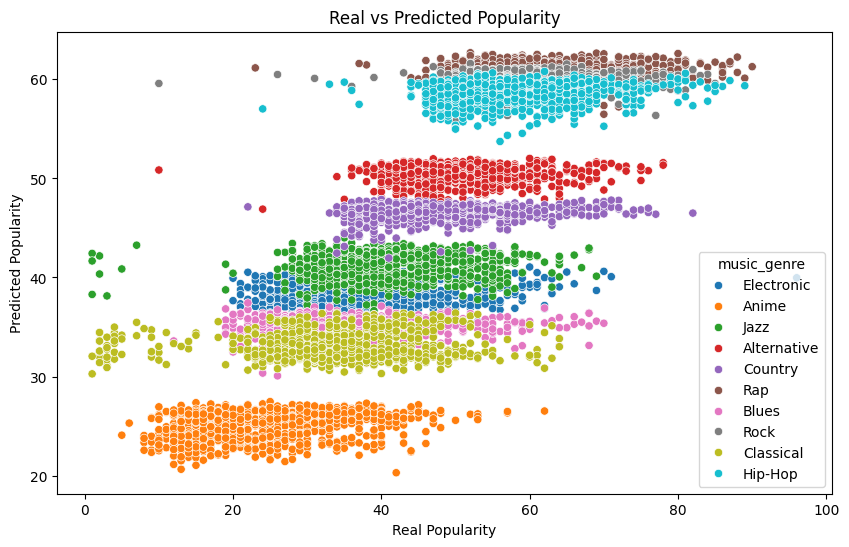

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity_real', y='popularity_pred', data=df_results, hue=df['music_genre'])
plt.title('Real vs Predicted Popularity')
plt.xlabel('Real Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rsme = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rsme}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 76.23962866338857
Root Mean Squared Error: 8.731530717084409
R-squared: 0.6463399150910685
Mean Absolute Error: 6.759495148567307


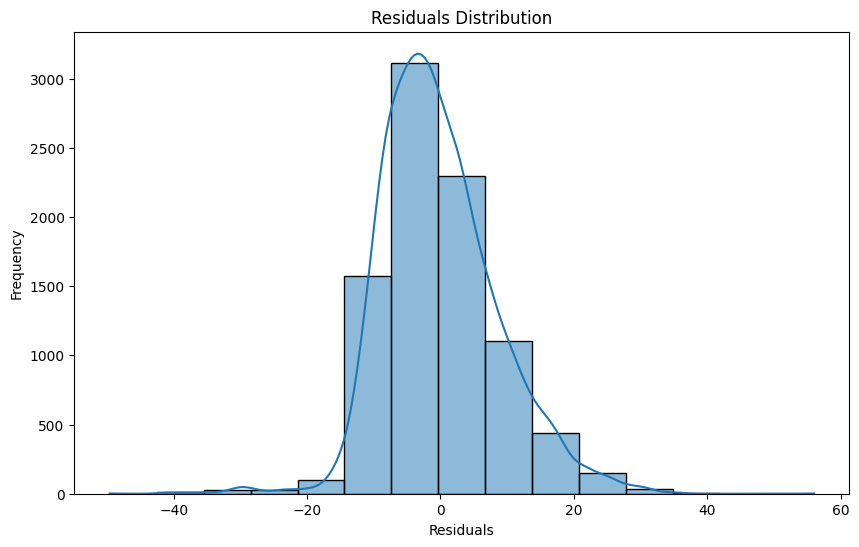

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

In [28]:
df_results_tree = X_test.copy()
df_results_tree['popularity_real'] = y_test
df_results_tree['popularity_pred'] = y_pred_dt.round(2)

df_results_tree.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,...,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_real,popularity_pred
18819,0.203000,0.541,0.8120,0.000000,0.4200,-3.764,0.0336,141.056,0.6070,False,...,False,False,True,False,False,False,False,False,62.0,40.0
17684,0.013900,0.641,0.7320,0.000003,0.0620,-7.570,0.0795,92.057,0.7630,False,...,False,False,False,False,False,False,False,False,57.0,45.0
5688,0.008850,0.698,0.8200,0.000000,0.0901,-3.809,0.1300,141.995,0.9620,False,...,False,False,False,False,False,False,False,False,23.0,20.0
22846,0.301000,0.749,0.8870,0.000030,0.2970,-0.898,0.0436,135.006,0.6380,False,...,False,False,False,False,False,False,True,False,59.0,62.0
9255,0.024600,0.680,0.4090,0.914000,0.0757,-8.695,0.0898,180.893,0.4270,False,...,False,False,False,False,False,True,False,False,37.0,35.0
5730,0.202000,0.608,0.8080,0.002330,0.3120,-5.238,0.0310,119.980,0.4100,False,...,False,False,False,False,False,False,False,False,14.0,29.0
37829,0.995000,0.337,0.0445,0.890000,0.0748,-25.484,0.0455,70.350,0.0398,False,...,False,True,False,False,False,False,False,False,36.0,36.0
4194,0.000724,0.800,0.6360,0.798000,0.1010,-8.520,0.2570,77.505,0.6990,False,...,False,False,False,True,False,False,False,False,35.0,31.0
31149,0.026000,0.621,0.8040,0.013600,0.0490,-10.753,0.2360,176.111,0.3890,False,...,True,False,False,False,False,False,False,False,33.0,69.0
7155,0.019400,0.572,0.8000,0.000000,0.1140,-4.009,0.0540,151.490,0.6350,False,...,False,False,False,False,False,False,False,False,28.0,15.0


En este caso tenemos un peor desempeño para los arboles de decision, deberiamos cambiar parametros para ver si mejora

In [29]:
mse_tree = mean_squared_error(y_test, y_pred_dt)
rsme_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_dt)
mae_tree = mean_absolute_error(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_tree}')
print(f'Root Mean Squared Error: {rsme_tree}')
print(f'R-squared: {r2_tree}')
print(f'Mean Absolute Error: {mae_tree}')

Mean Squared Error: 157.7173949769118
Root Mean Squared Error: 12.558558634529355
R-squared: 0.26838117817413076
Mean Absolute Error: 9.62535195404888


Obtuvimos un mejor resultado con el RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

In [31]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Root Mean Squared Error (RF): {rmse_rf}')
print(f'R-squared (RF): {r2_rf}')
print(f'Mean Absolute Error (RF): {mae_rf}')

Mean Squared Error (RF): 77.02472285819849
Root Mean Squared Error (RF): 8.776372989920066
R-squared (RF): 0.6426980232761977
Mean Absolute Error (RF): 6.806380711041034


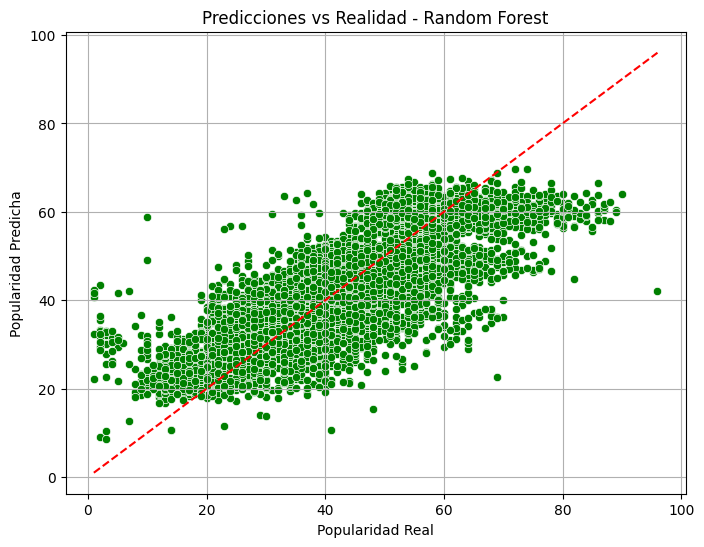

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.title("Predicciones vs Realidad - Random Forest")
plt.grid(True)
plt.show()

In [33]:
from sklearn.svm import SVR

model_svr = SVR(kernel='linear')
model_svr.fit(X_train_scaled, y_train)

y_pred_svr = model_svr.predict(X_test_scaled)

In [34]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'Root Mean Squared Error (SVR): {rmse_svr}')
print(f'R-squared (SVR): {r2_svr}')
print(f'Mean Absolute Error (SVR): {mae_svr}')

Mean Squared Error (SVR): 77.11064188767162
Root Mean Squared Error (SVR): 8.781266530955065
R-squared (SVR): 0.6422994624254763
Mean Absolute Error (SVR): 6.6727140697492775


In [35]:
model_svr_rbf = SVR(kernel='rbf')
model_svr_rbf.fit(X_train_scaled, y_train)

y_pred_svr_rbf = model_svr_rbf.predict(X_test_scaled)

In [36]:
mse_svr_rbf = mean_squared_error(y_test, y_pred_svr_rbf)
rmse_svr_rbf = mse_svr_rbf ** 0.5
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)
mae_svr_rbf = mean_absolute_error(y_test, y_pred_svr_rbf)

print(f'Mean Squared Error (SVR RBF): {mse_svr_rbf}')
print(f'Root Mean Squared Error (SVR RBF): {rmse_svr_rbf}')
print(f'R-squared (SVR RBF): {r2_svr_rbf}')
print(f'Mean Absolute Error (SVR RBF): {mae_svr_rbf}')

Mean Squared Error (SVR RBF): 77.59175476079378
Root Mean Squared Error (SVR RBF): 8.808618209503337
R-squared (SVR RBF): 0.640067677951415
Mean Absolute Error (SVR RBF): 6.701945017316868


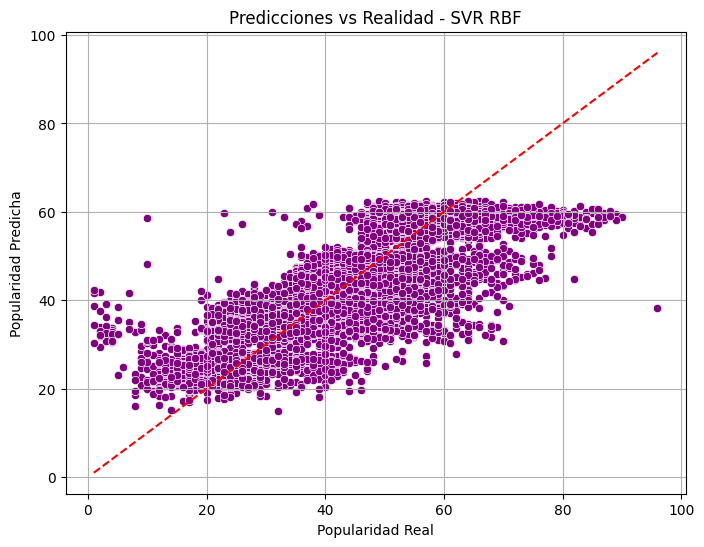

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_svr_rbf, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.title("Predicciones vs Realidad - SVR RBF")
plt.grid(True)
plt.show()